In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pickle

In [ ]:
from utils.process import Assemble
assemble = Assemble()
from utils.process import Categorize
categorize = Categorize()
from utils.generate import Generate
generate = Generate()
from utils.train import Create, Build
create = Create()
from utils.process import Preprocess
precprocess = Preprocess()
from utils.process import Test
test = Test()

In [ ]:
df = pd.read_csv('Clean_Dataset.csv')

In [ ]:
1. B & E

1. Economy (days_left categorical)
2. Economy (days_left numerical)
3. Economy aktarmalı
4. Economy aktarmasız duration yok

1. Business (stops= aktarmalı - aktarmasız) no duration B1RFR1, B1RFR2, B1LR1
2. Business ()
2. Business (days_left)
3. Business

# Data Prep

In [ ]:
df['path'] = df['source_city'] + ' ' + df['destination_city']

In [ ]:
df['time'] = df['departure_time'] + ' ' + df['arrival_time']

In [ ]:
df.replace({'Economy':0,'Business':1}, inplace=True)

In [ ]:
df = df.drop(['Unnamed: 0','flight','source_city','destination_city','departure_time','arrival_time'], axis=1)

In [ ]:
df.dropna(inplace=True)

### days_left Categorization

In [ ]:
days_left_ranges = generate.generate_numerical_ranges(df.days_left, [2,5,10,18])
days_left_dict = categorize.categorize_numerical_variable(df.days_left, days_left_ranges)
df['days_left_category'] = df['days_left'].map(days_left_dict)

### path Categorization

In [ ]:
start = df.groupby('path').mean()['price'].min()
finish = df.groupby('path').mean()['price'].max()

In [ ]:
path_ranges = generate.generate_categorical_ranges(3, start, finish)
path_ranges

[range(17243, 19855), range(19855, 22467), range(22467, 37619)]

In [ ]:
path_group = df.groupby('path').mean()['price']
path_dict = categorize.categorize_categorical_variable(path_group, path_ranges)
df['path_category'] = df['path'].map(path_dict)

### duration Categorization

In [ ]:
duration_ranges = generate.generate_numerical_ranges(df.duration, [5,18,28])
duration_dict = categorize.categorize_numerical_variable(df.duration, duration_ranges)
df['duration_category']=df['duration'].map(duration_dict)

### time Categorization

In [ ]:
start = df.groupby('time').mean()['price'].min()
finish = df.groupby('time').mean()['price'].max()

In [ ]:
time_ranges = generate.generate_categorical_ranges(3, start, finish)
time_ranges

[range(4288, 13333), range(13333, 22378), range(22378, 47135)]

In [ ]:
time_group = df.groupby('time').mean()['price']
time_dict = categorize.categorize_categorical_variable(time_group, time_ranges)
df['time_category'] = df['time'].map(time_dict)

# All Data

## All Data 1

In [ ]:
df_all1 = df.drop(['days_left','duration','path','time'], axis=1)

## All Data 2

In [ ]:
df_all2 = df.drop(['days_left_category','duration_category','path_category','time_category'], axis=1)

# Economy Business Split

In [ ]:
df_economy = df[df['class']==0]
df_economy = df_economy.drop('class',axis=1)
df_business = df[df['class']==1]
df_business = df_business.drop('class',axis=1)

## Economy 1

In [ ]:
df_economy1 = df_economy.drop(['days_left','duration','path','time'], axis=1)

## Economy 2

In [ ]:
df_economy2 = df_economy.drop(['days_left_category','path_category','duration_category','time_category'], axis=1)

## Economy 3

In [ ]:
df_economy3 = df_economy.drop(['stops','path','duration_category','days_left_category','time_category'], axis=1)

## Business 1

In [ ]:
df_business1 = df_business.drop(['days_left','duration','path','time','days_left_category'], axis=1)
df_business1.replace({'zero':0,'one':1,'two_or_more':2}, inplace=True)

## Business 2

In [ ]:
df_business2 = df_business.drop(['days_left_category','path_category','duration_category','time_category'], axis=1)
df_business2.replace({'zero':0,'one':1,'two_or_more':2}, inplace=True)

## Business 3

In [ ]:
df_business3 = df_business.drop(['days_left','days_left_category','path','time','duration'], axis=1)

# Regression Models Dictionary

In [ ]:
# df , split data , models , predictions

In [ ]:
economy_regression_test_dict = {}
business_regression_test_dict = {}
all_regression_test_dict = {}

In [ ]:
economy_regression_test_dict['data'] = {'E1':df_economy1, 'E2':df_economy2} #economy_regression_test_dict['data'] = {'E1':df_economy1, 'E2':df_economy2, 'E3':df_economy3}

#business_regression_test_dict['data'] = {'B1':df_business1, 'B2':df_business2, 'B3':df_business3}
#all_regression_test_dict['data'] = {'A1':df_all1, 'A2':df_all2}

# Model Training

In [ ]:
models = [['LR1', {}],
          ['RFR1', {'n_estimators': 20, 'criterion':'squared_error'}],
          ['RFR2', {'n_estimators': 20, 'criterion':'poisson'}],
          ['RFR3', {'n_estimators': 100, 'criterion':'squared_error'}],
          ['RFR4', {'n_estimators': 100, 'criterion':'poisson'}],
          ['GBR1', {'learning_rate':0.1, 'criterion':'friedman_mse', 'n_estimators':20, 'loss':'squared_error'}]
          ]

In [ ]:
def rfr para()

In [ ]:
build_economy = Build(economy_regression_test_dict)

In [ ]:
build_business = Build(business_regression_test_dict)

In [ ]:
build_all = Build(all_regression_test_dict)

In [ ]:
build_all.build_regression_models(models, 'price')

In [ ]:
build_business.build_regression_models(models, 'price')

In [ ]:
build_economy.build_regression_models(models, 'price')

Training regression model LR1 for E1
Training done!

Training regression model RFR1 for E1
Training done!

Training regression model RFR2 for E1
Training done!

Training regression model RFR3 for E1
Training done!

Training regression model RFR4 for E1
Training done!

Training regression model GBR1 for E1
Training done!

Training regression model LR1 for E2
Training done!

Training regression model RFR1 for E2
Training done!

Training regression model RFR2 for E2
Training done!

Training regression model RFR3 for E2
Training done!

Training regression model RFR4 for E2
Training done!

Training regression model GBR1 for E2
Training done!



# Error Metrics

## Economy

In [ ]:
economy_test_tables_dict = assemble.assemble_test_tables( economy_regression_test_dict)

In [ ]:
economy_regression_test_dict['test_tables'] = economy_test_tables_dict

In [ ]:
economy_error_values = assemble.assemble_error_values(economy_regression_test_dict)

In [ ]:
economy_error_values.sort_values(by='NRMSE').head(10)

,MEPE,MPE,MEAE,MAE,MSE,RMSE,NRMSE,STD
E2RFR3,2.960,8.685,173.687,631.561,2012567.527,1418.650,0.038824,3740.274
E2RFR1,3.039,8.852,178.500,643.564,2080718.257,1442.469,0.039475,3740.274
E2RFR4,6.227,14.263,352.155,929.053,3276937.895,1810.231,0.049540,3740.274
E2RFR2,6.233,14.386,355.300,938.417,3367354.258,1835.035,0.050219,3740.274
E1RFR3,18.739,25.266,1013.020,1478.029,4936325.752,2221.784,0.060802,3740.274
E1RFR4,18.753,25.275,1013.246,1478.371,4938075.769,2222.178,0.060813,3740.274
E1RFR1,18.737,25.273,1010.805,1478.427,4940468.374,2222.716,0.060828,3740.274
E1RFR2,18.760,25.283,1010.887,1478.875,4942653.320,2223.208,0.060841,3740.274
E2GBR1,20.146,29.653,1157.428,1588.736,5443526.274,2333.137,0.063850,3740.274
E1LR1,21.094,28.773,1196.006,1649.051,5766668.522,2401.389,0.065718,3740.274


In [ ]:
economy_error_values.sort_values(by='RMSE').

,MEPE,MPE,MEAE,MAE,MSE,RMSE,STD
E2RFR3,2.960,8.685,173.687,631.561,2012567.527,1418.650,3740.274
E2RFR1,3.039,8.852,178.500,643.564,2080718.257,1442.469,3740.274
E2RFR4,6.227,14.263,352.155,929.053,3276937.895,1810.231,3740.274
E2RFR2,6.233,14.386,355.300,938.417,3367354.258,1835.035,3740.274
E3RFR3,7.461,14.869,432.130,1000.627,3440018.936,1854.729,3740.274
E3RFR1,7.581,15.052,436.287,1014.081,3523984.914,1877.228,3740.274
E2GBR8,14.864,20.302,832.121,1259.993,4120699.510,2029.951,3740.274
E2GBR5,16.631,23.155,931.035,1347.169,4205966.523,2050.845,3740.274
E2GBR6,15.651,21.651,880.041,1313.374,4321174.732,2078.744,3740.274
E2GBR7,17.213,24.155,968.517,1386.818,4392201.749,2095.758,3740.274


In [ ]:
economy_error_values.sort_values(by='MSE').head(10)

,MEPE,MPE,MEAE,MAE,MSE,RMSE,STD
E2RFR3,2.960,8.685,173.687,631.561,2012567.527,1418.650,3740.274
E2RFR1,3.039,8.852,178.500,643.564,2080718.257,1442.469,3740.274
E2RFR4,6.227,14.263,352.155,929.053,3276937.895,1810.231,3740.274
E2RFR2,6.233,14.386,355.300,938.417,3367354.258,1835.035,3740.274
E3RFR3,7.461,14.869,432.130,1000.627,3440018.936,1854.729,3740.274
E3RFR1,7.581,15.052,436.287,1014.081,3523984.914,1877.228,3740.274
E2GBR8,14.864,20.302,832.121,1259.993,4120699.510,2029.951,3740.274
E2GBR5,16.631,23.155,931.035,1347.169,4205966.523,2050.845,3740.274
E2GBR6,15.651,21.651,880.041,1313.374,4321174.732,2078.744,3740.274
E2GBR7,17.213,24.155,968.517,1386.818,4392201.749,2095.758,3740.274


In [ ]:
economy_test_tables_dict['E2RFR3'].describe()

,true_values,predictions,error(%)
count,41334.000000,41334.000000,41334.000000
mean,6559.483137,6563.316528,8.684769
std,3740.274081,3496.757010,15.061094
min,1105.000000,1105.000000,0.000000
25%,4173.000000,4285.095000,0.368387
50%,5762.000000,5796.290000,2.960216
75%,7677.000000,7754.850000,10.522874
max,37646.000000,32545.955000,313.142243


In [ ]:
test_table[test_table['error(%)']>30].index

Int64Index([ 30604, 177351,  54876,  34055, 195241,  98491, 102922,  85492,
             21508, 185077,
            ...
             65462,  45492,  61292,  37057,  60853,  10130,  12078, 198841,
             22534, 147604],
           dtype='int64', length=2963)

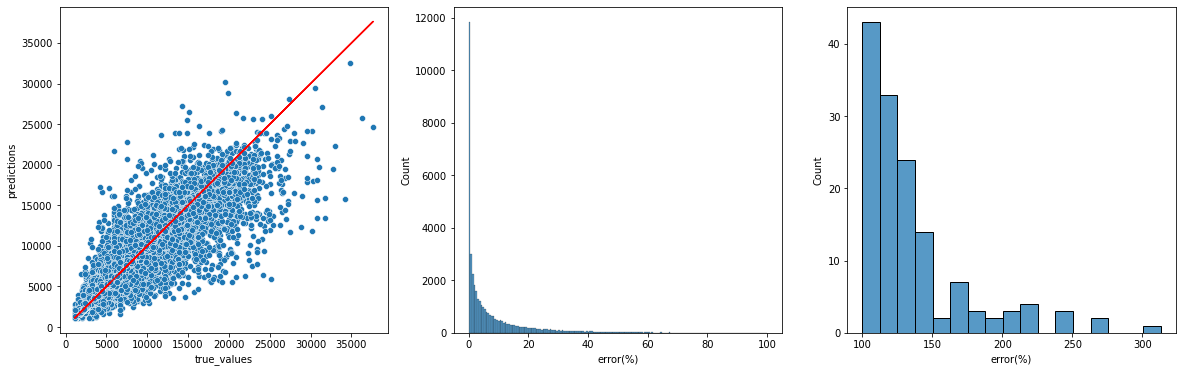

In [ ]:
import matplotlib.pyplot as plt
test_table = economy_test_tables_dict['E2RFR3']
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.scatterplot(x='true_values',y='predictions',data=economy_test_tables_dict['E2RFR3'])
plt.plot(economy_test_tables_dict['E2RFR3']['true_values'], economy_test_tables_dict['E2RFR3']['true_values'], color = 'r')
plt.subplot(1,3,2)
sns.histplot(x='error(%)', data=test_table[test_table['error(%)']<100])
plt.subplot(1,3,3)
sns.histplot(x='error(%)', data=test_table[test_table['error(%)']>100])

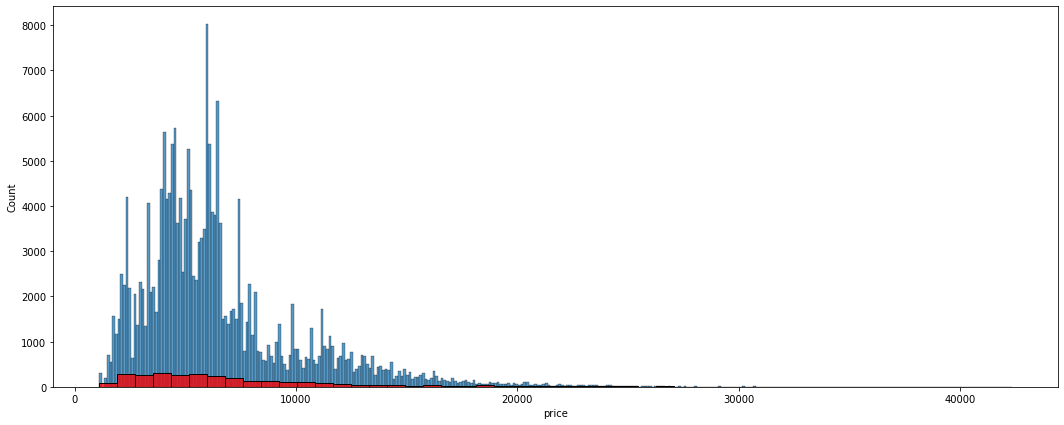

In [ ]:
plt.figure(figsize=(18,7))
sns.histplot(df_economy2['price']);
sns.histplot(test_table[test_table['error(%)']>30]['true_values'], color ='r')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


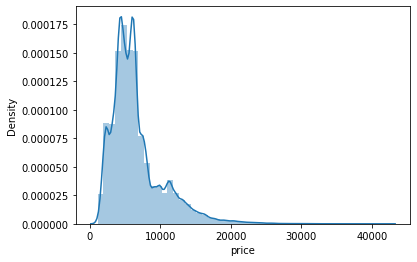

In [ ]:
import seaborn as sns
sns.distplot(df_economy.price)

In [ ]:
economy_variability_values = assemble.assemble_variability_values(economy_regression_test_dict)

In [ ]:
import seaborn as sns

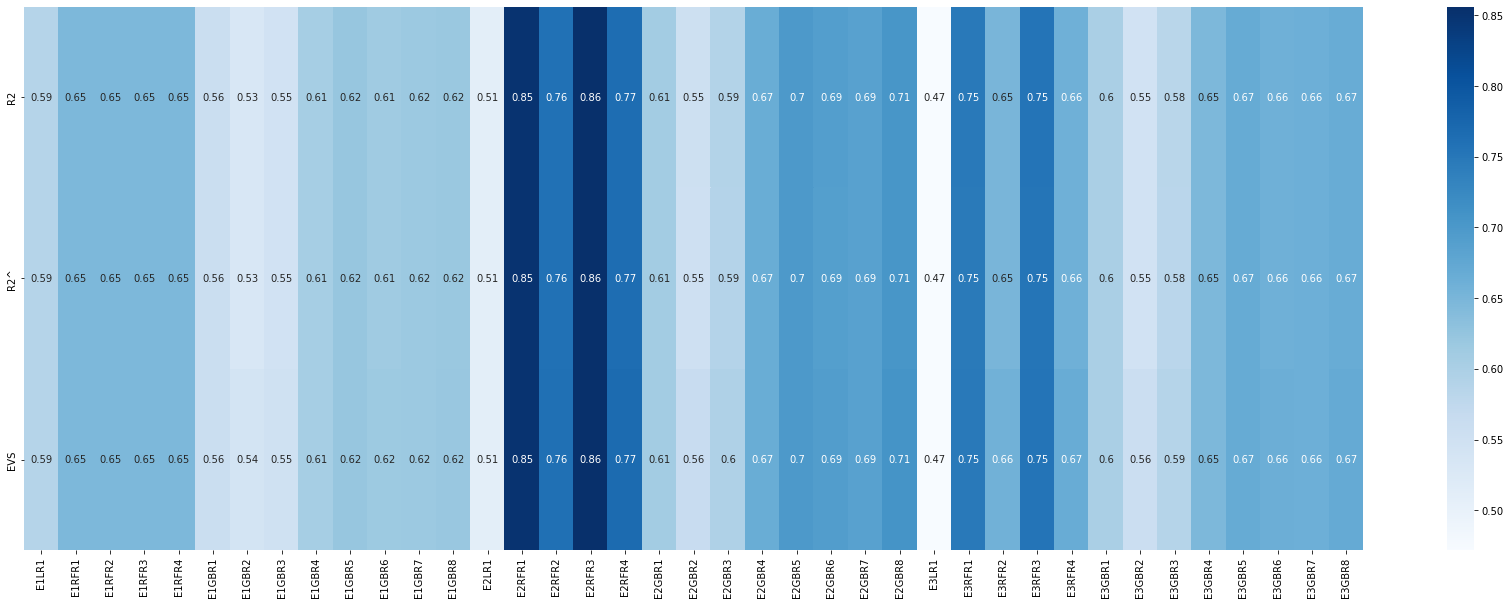

In [ ]:
plt.figure(figsize=(30,10))
sns.heatmap(data = economy_variability_values, annot = True, cmap = 'Blues')

## Business

In [ ]:
business_test_tables_dict = assemble.assemble_test_tables(business_regression_test_dict)

In [ ]:
business_regression_test_dict['test_tables'] = business_test_tables_dict

In [ ]:
business_error_values = assemble.assemble_error_values(business_regression_test_dict)
business_error_values = business_error_values.transpose()

In [ ]:
business_error_values.sort_values(by='MEPE').head()

,MEPE,MPE,MEAE,MAE,MSE,RMSE,STD
B2RFR1,0.045,3.776,24.050,2148.293,2.143953e+07,4630.284,12951.701
B2RFR3,0.345,3.749,171.360,2132.751,2.091745e+07,4573.560,12951.701
B2RFR2,2.997,7.887,1558.950,3841.413,4.435588e+07,6660.021,12951.701
B2RFR4,3.005,7.838,1556.645,3806.031,4.310515e+07,6565.451,12951.701
B2GBR8,7.476,10.723,3776.847,5363.836,5.425031e+07,7365.481,12951.701


In [ ]:
business_variability_values = assemble.assemble_variability_values(business_regression_test_dict)

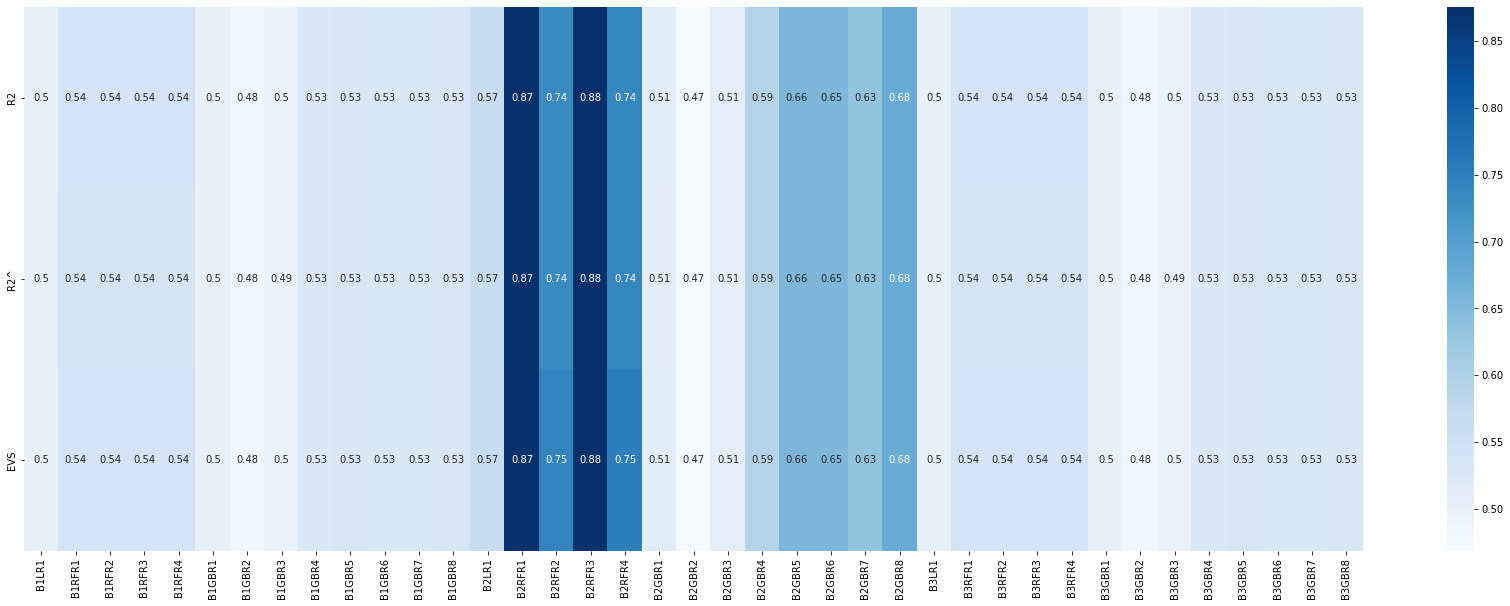

In [ ]:
plt.figure(figsize=(30,10))
sns.heatmap(data = business_variability_values, annot = True, cmap = 'Blues')

In [ ]:
with open('economy_regression_test_dict.pkl', 'wb') as f:
    pickle.dump(economy_regression_test_dict, f)

In [ ]:
with open('economy_regression_test_dict.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

In [ ]:
loaded_dict.keys()

## All

In [ ]:
all_test_tables_dict = assemble.assemble_test_tables(all_regression_test_dict)

In [ ]:
all_regression_test_dict['test_tables'] = all_test_tables_dict

In [ ]:
all_error_values = assemble.assemble_error_values(all_regression_test_dict)
all_error_values = all_error_values.transpose()

In [ ]:
all_error_values.sort_values(by='MEPE').head()

,MEPE,MPE,MEAE,MAE,MSE,RMSE,STD
A2RFR1,1.937,7.295,163.25,1113.752,7.979444e+06,2824.791,22612.54
A2RFR3,1.979,7.223,173.21,1101.980,7.761890e+06,2786.017,22612.54
A2RFR4,5.184,12.279,489.63,1812.360,1.535036e+07,3917.954,22612.54
A2RFR2,5.257,12.436,495.35,1840.780,1.602908e+07,4003.633,22612.54
A2GBR8,13.799,20.013,1379.20,2754.691,2.279586e+07,4774.502,22612.54


In [ ]:
all_variability_values = assemble.assemble_variability_values(all_regression_test_dict)

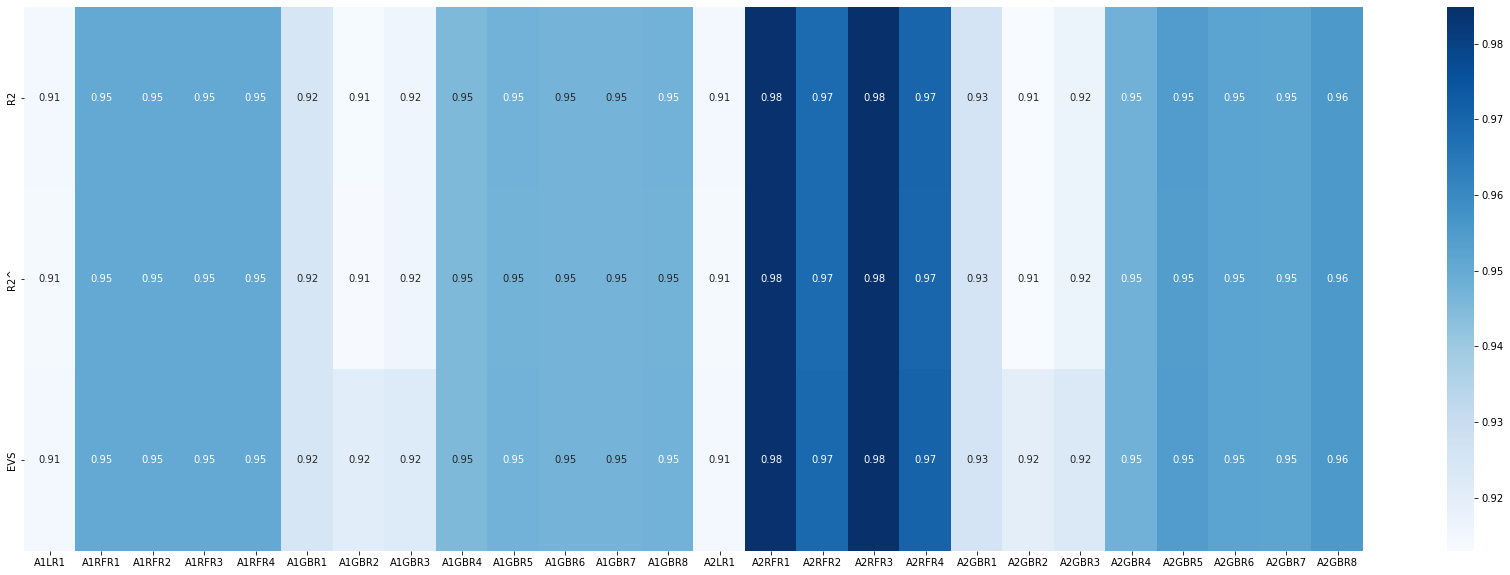

In [ ]:
plt.figure(figsize=(30,10))
sns.heatmap(data = all_variability_values, annot = True, cmap = 'Blues')

# Comparison

In [ ]:
economy_regression_test_dict.keys()

dict_keys(['data', 'predictions', 'models', 'y_test', 'X_test', 'test_tables'])

In [ ]:
economy_index = economy_regression_test_dict['test_tables']['E2RFR3'].index

In [ ]:
economy_test_table = economy_regression_test_dict['test_tables']['E2RFR3']

In [ ]:
all_index = all_regression_test_dict['test_tables']['A2RFR1'].index

In [ ]:
all_test_table = all_regression_test_dict['test_tables']['A2RFR1']

In [ ]:
len(economy_index), len(all_test_table)

(41334, 60031)

In [ ]:
common_economy_indexes = all_test_table[all_test_table.index.isin(economy_index)].index
common_economy_indexes

Int64Index([185846,  17827,  25215,  89024,  40245,   8575, 114748, 177601,
             89685,  43226,
            ...
            201781,   6513, 161331,  64367,  33926,  90619,  30848,  62520,
              5107,  85265],
           dtype='int64', length=13267)

In [ ]:
df_all2[df_all2.index.isin(common_economy_indexes)]['class'].unique()

array([0])

In [ ]:
all_test_table[all_test_table.index.isin(common_economy_indexes)].sort_index()

,true_values,predictions,error(%)
14,5955,6198.95,4.096558
29,10470,9510.90,9.160458
32,12150,16787.15,38.165844
36,12150,12507.60,2.943210
44,12215,14238.60,16.566517
...,...,...,...
206531,1551,1550.60,0.025790
206543,3810,3823.80,0.362205
206561,3979,4057.75,1.979140
206626,4086,4424.60,8.286833


In [ ]:
economy_test_table[economy_test_table.index.isin(common_economy_indexes)].sort_index()

,true_values,predictions,error(%)
14,5955,7317.585000,22.881360
29,10470,8802.765000,15.923926
32,12150,17156.570000,41.206337
36,12150,13245.730000,9.018354
44,12215,15045.520000,23.172493
...,...,...,...
206531,1551,1551.000000,0.000000
206543,3810,4056.370000,6.466404
206561,3979,3991.600000,0.316662
206626,4086,4316.770000,5.647822


In [ ]:
all_test_error = test.test_error_values(all_test_table)
all_test_error_df = pd.DataFrame(all_test_error, index=['MEPE','MPE','MEAE','MAE','MSE','RMSE', 'STD'], columns=['A2RFR1'])

In [ ]:
economy_test_error = test.test_error_values(economy_test_table)
economy_test_error_df = pd.DataFrame(economy_test_error, index=['MEPE','MPE','MEAE','MAE','MSE','RMSE', 'STD'], columns=['E2RFR3'])

In [ ]:
pd.concat([all_test_error_df, economy_test_error_df], axis=1)

,A2RFR1,E2RFR3
MEPE,1.937,2.960
MPE,7.295,8.685
MEAE,163.250,173.687
MAE,1113.752,631.561
MSE,7979444.223,2012567.527
RMSE,2824.791,1418.650
STD,22612.540,3740.274


# Deployment

## Economy

In [ ]:
pd.DataFrame(models)

,0,1
0,LR1,{}
1,RFR1,"{'n_estimators': 20, 'criterion': 'squared_err..."


In [ ]:
X, y, scaler = precprocess.preprocess_deployment_data(df_economy, 'price')

In [ ]:
regressor = train.train_regression_model((X, y), 'RFR', {'n_estimators': 20, 'criterion':'squared_error'})

## Business